# Chapter 1: History of Fractal Mathematics

This notebook provides interactive mathematical examples corresponding to the historical development of fractal geometry, from the "mathematical monsters" of the late 19th century to modern fractal theory.

**Topics covered:**
- Georg Cantor and the Cantor Set (1883)
- Helge von Koch and the Koch Snowflake (1904)
- Waclaw Sierpinski's Triangle and Carpet (1915-1916)
- Gaston Julia and Julia Sets (1918)
- Karl Weierstrass and Nowhere Differentiable Functions (1872)
- Benoit Mandelbrot and the Mandelbrot Set (1975-1980)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from numba import jit, prange
import warnings
warnings.filterwarnings('ignore')

# Set default figure style
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100

## 1.1 Georg Cantor and the Cantor Set (1883)

Georg Cantor, working on set theory and the continuum, introduced the **Cantor set** in 1883. The construction iteratively removes the middle third of each interval:

1. Begin with $[0, 1]$
2. Remove the open middle third $(1/3, 2/3)$, leaving $[0, 1/3] \cup [2/3, 1]$
3. Continue *ad infinitum*

**Properties:**
- **Measure zero**: Total length removed equals 1
- **Uncountably infinite**: Contains as many points as the real line
- **Fractal dimension**: $D = \frac{\log 2}{\log 3} \approx 0.631$

Cantor Set Fractal Dimension: D = log(2)/log(3) = 0.6309


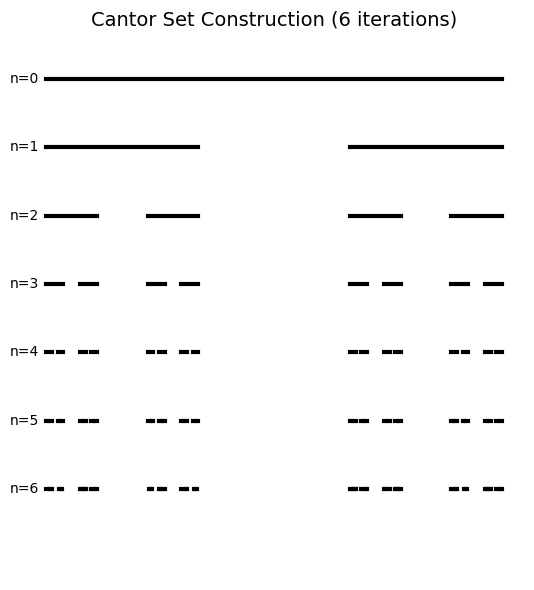

In [2]:
def cantor_set(ax, x, y, length, depth, max_depth):
    """Draw the Cantor set recursively, showing all stages."""
    # Draw current segment
    ax.plot([x, x + length], [y, y], color='black', lw=3)
    
    if depth < max_depth:
        new_length = length / 3
        new_y = y - 0.15
        # Recurse on left and right thirds
        cantor_set(ax, x, new_y, new_length, depth + 1, max_depth)
        cantor_set(ax, x + 2 * new_length, new_y, new_length, depth + 1, max_depth)

# Visualize Cantor set construction
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Cantor Set Construction (6 iterations)', fontsize=14)
cantor_set(ax, 0, 1, 1, 0, 6)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.1, 1.1)
ax.set_aspect('equal')
ax.axis('off')

# Add annotations
for i in range(7):
    ax.text(-0.08, 1 - i * 0.15, f'n={i}', fontsize=10, va='center')

# Calculate dimension
D_cantor = np.log(2) / np.log(3)
print(f"Cantor Set Fractal Dimension: D = log(2)/log(3) = {D_cantor:.4f}")
plt.tight_layout()
plt.show()

## 1.2 Helge von Koch and the Koch Snowflake (1904)

Swedish mathematician Helge von Koch constructed his curve in 1904 to demonstrate a continuous curve that is **nowhere differentiable**.

**Construction:**
1. Begin with a line segment
2. Replace the middle third with two sides of an equilateral triangle pointing outward
3. Repeat on every segment

**Properties:**
- **Infinite perimeter**: Each iteration multiplies length by $4/3$
- **Finite area**: Converges to $\frac{8}{5}$ times the original triangle
- **Fractal dimension**: $D = \frac{\log 4}{\log 3} \approx 1.262$

Koch Curve Fractal Dimension: D = log(4)/log(3) = 1.2619
Each iteration multiplies perimeter by 4/3 = 1.3333


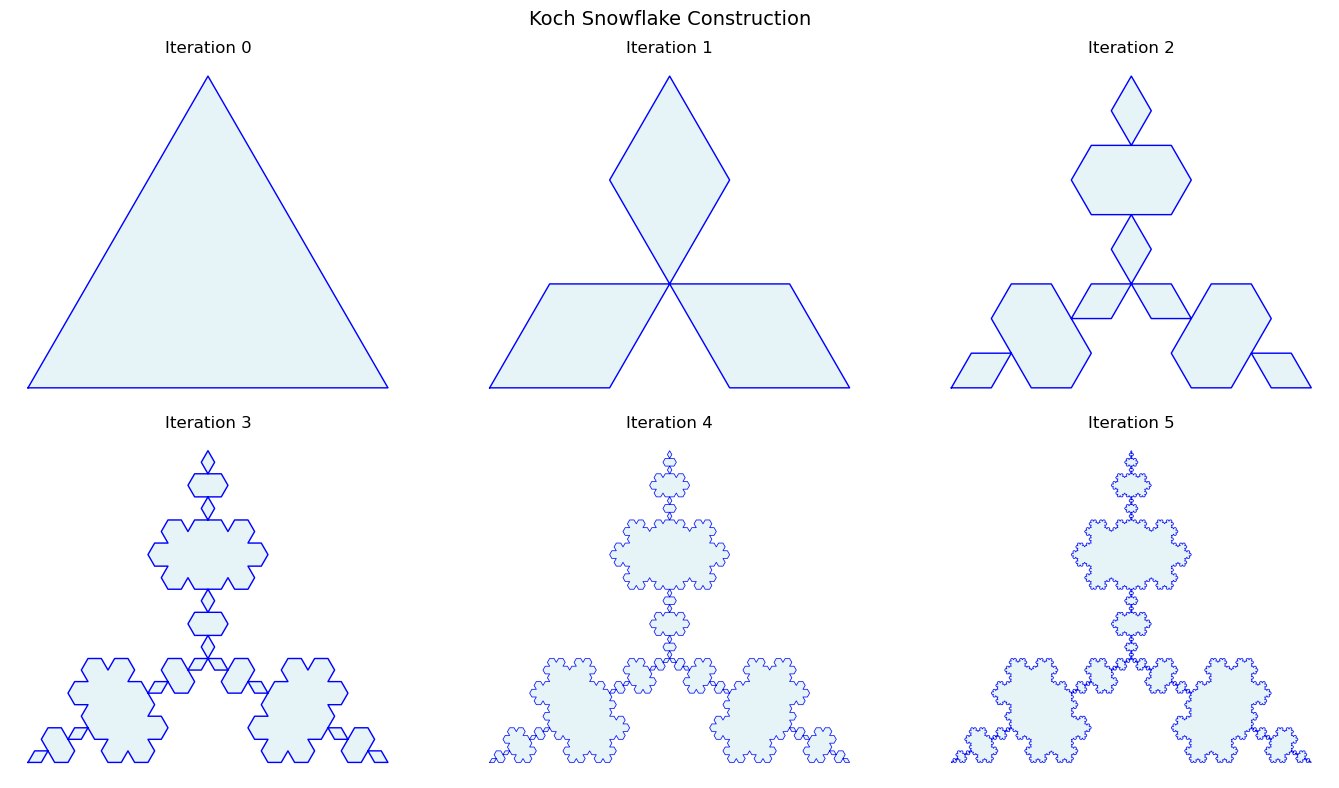

In [3]:
def koch_curve(p1, p2, depth):
    """Generate Koch curve points between p1 and p2."""
    if depth == 0:
        return [p1, p2]
    
    # Calculate intermediate points
    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]
    
    # Points dividing the segment into thirds
    a = p1
    b = (p1[0] + dx/3, p1[1] + dy/3)
    d = (p1[0] + 2*dx/3, p1[1] + 2*dy/3)
    e = p2
    
    # Peak of the equilateral triangle
    # Rotate the middle third by 60 degrees
    cx = b[0] + dx/6 - dy * np.sqrt(3)/6
    cy = b[1] + dy/6 + dx * np.sqrt(3)/6
    c = (cx, cy)
    
    # Recurse on each segment
    points = []
    for seg in [(a, b), (b, c), (c, d), (d, e)]:
        pts = koch_curve(seg[0], seg[1], depth - 1)
        points.extend(pts[:-1])
    points.append(e)
    return points

def koch_snowflake(depth):
    """Generate a complete Koch snowflake."""
    # Start with equilateral triangle
    h = np.sqrt(3) / 2
    vertices = [(0, 0), (1, 0), (0.5, h)]
    
    all_points = []
    for i in range(3):
        p1 = vertices[i]
        p2 = vertices[(i + 1) % 3]
        points = koch_curve(p1, p2, depth)
        all_points.extend(points[:-1])
    all_points.append(all_points[0])  # Close the curve
    return all_points

# Visualize Koch curve evolution
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, depth in enumerate(range(6)):
    points = koch_snowflake(depth)
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    
    axes[i].plot(xs, ys, 'b-', lw=0.5 if depth > 3 else 1)
    axes[i].fill(xs, ys, alpha=0.3, color='lightblue')
    axes[i].set_title(f'Iteration {depth}', fontsize=12)
    axes[i].set_aspect('equal')
    axes[i].axis('off')

fig.suptitle('Koch Snowflake Construction', fontsize=14)

# Calculate dimension
D_koch = np.log(4) / np.log(3)
print(f"Koch Curve Fractal Dimension: D = log(4)/log(3) = {D_koch:.4f}")
print(f"Each iteration multiplies perimeter by 4/3 = {4/3:.4f}")
plt.tight_layout()
plt.show()

## 1.3 Waclaw Sierpinski: Triangle and Carpet (1915-1916)

Polish mathematician Waclaw Sierpinski introduced two fundamental fractals.

### Sierpinski Triangle
- **Construction**: Remove central inverted triangle from each remaining triangle
- **$N = 3$** copies at scale $r = 1/2$
- **Dimension**: $D = \frac{\log 3}{\log 2} \approx 1.585$

### Sierpinski Carpet
- **Construction**: Divide square into $3 \times 3$ grid, remove center
- **$N = 8$** copies at scale $r = 1/3$
- **Dimension**: $D = \frac{\log 8}{\log 3} \approx 1.893$

Sierpinski Triangle Dimension: D = log(3)/log(2) = 1.5850


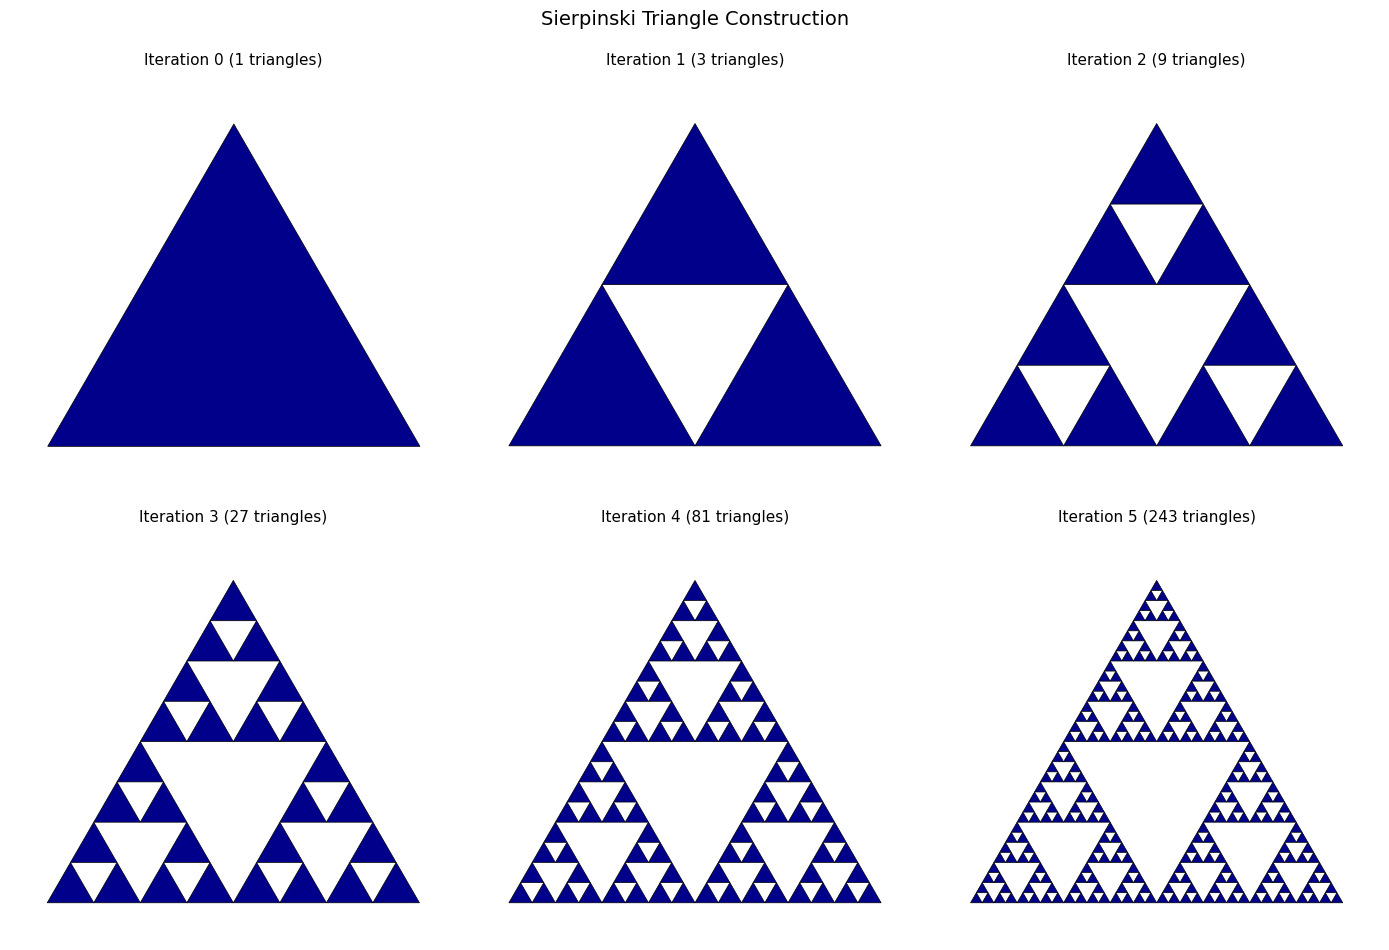

In [4]:
def sierpinski_triangle(ax, vertices, depth, patches):
    """Generate Sierpinski triangle recursively."""
    if depth == 0:
        triangle = Polygon(vertices, closed=True)
        patches.append(triangle)
    else:
        # Calculate midpoints
        midpoints = [(vertices[i] + vertices[(i + 1) % 3]) / 2 for i in range(3)]
        # Recurse on three corner triangles
        sierpinski_triangle(ax, np.array([vertices[0], midpoints[0], midpoints[2]]), depth-1, patches)
        sierpinski_triangle(ax, np.array([vertices[1], midpoints[1], midpoints[0]]), depth-1, patches)
        sierpinski_triangle(ax, np.array([vertices[2], midpoints[2], midpoints[1]]), depth-1, patches)

# Visualize Sierpinski triangle evolution
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

for i, depth in enumerate(range(6)):
    patches = []
    sierpinski_triangle(axes[i], vertices, depth, patches)
    collection = PatchCollection(patches, facecolor='darkblue', edgecolor='black', linewidth=0.5)
    axes[i].add_collection(collection)
    axes[i].set_title(f'Iteration {depth} ({3**depth} triangles)', fontsize=11)
    axes[i].set_xlim(-0.1, 1.1)
    axes[i].set_ylim(-0.1, 1)
    axes[i].set_aspect('equal')
    axes[i].axis('off')

fig.suptitle('Sierpinski Triangle Construction', fontsize=14)

D_sierpinski = np.log(3) / np.log(2)
print(f"Sierpinski Triangle Dimension: D = log(3)/log(2) = {D_sierpinski:.4f}")
plt.tight_layout()
plt.show()

ValueError: range() arg 3 must not be zero

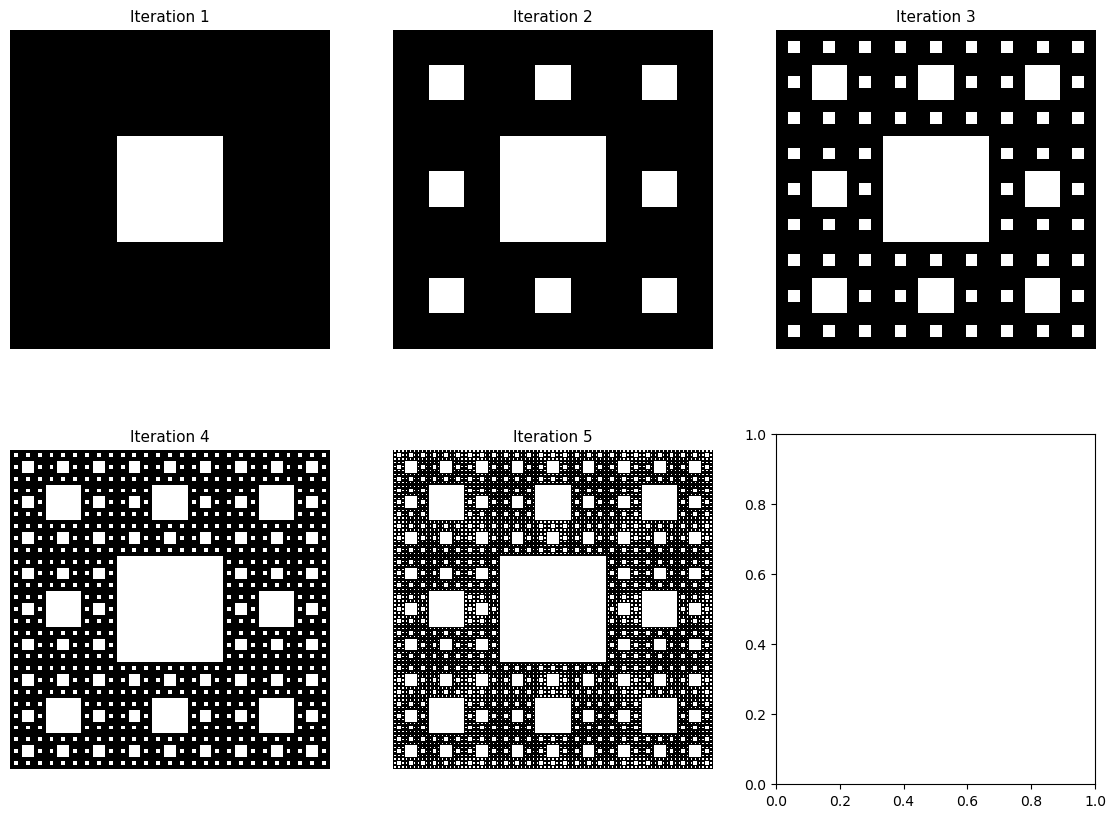

In [5]:
def sierpinski_carpet(depth, size=243):
    """Generate Sierpinski carpet as a binary image."""
    # Use size that's a power of 3 for clean division
    carpet = np.ones((size, size), dtype=bool)
    
    def remove_center(x, y, s):
        """Recursively remove center squares."""
        if s < 3:
            return
        third = s // 3
        # Remove center square
        carpet[y + third:y + 2*third, x + third:x + 2*third] = False
        # Recurse on 8 surrounding squares
        for dy in range(3):
            for dx in range(3):
                if dx == 1 and dy == 1:
                    continue  # Skip center
                remove_center(x + dx*third, y + dy*third, third)
    
    for d in range(depth):
        step = size // (3 ** (d + 1))
        for y in range(0, size, step * 3):
            for x in range(0, size, step * 3):
                carpet[y + step:y + 2*step, x + step:x + 2*step] = False
    
    return carpet

# Visualize Sierpinski carpet evolution
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

for i, depth in enumerate(range(1, 7)):
    carpet = sierpinski_carpet(depth)
    axes[i].imshow(carpet, cmap='binary', interpolation='nearest')
    axes[i].set_title(f'Iteration {depth}', fontsize=11)
    axes[i].axis('off')

fig.suptitle('Sierpinski Carpet Construction', fontsize=14)

D_carpet = np.log(8) / np.log(3)
print(f"Sierpinski Carpet Dimension: D = log(8)/log(3) = {D_carpet:.4f}")
plt.tight_layout()
plt.show()

## 1.4 Karl Weierstrass: Continuous but Nowhere Differentiable (1872)

Weierstrass constructed a function that is continuous everywhere but differentiable nowhere:

$$W(x) = \sum_{n=0}^{\infty} a^n \cos(b^n \pi x)$$

where $0 < a < 1$, $b$ is an odd integer, and $ab > 1 + \frac{3\pi}{2}$.

These "pathological" functions were essential precursors to fractal geometry—they showed that mathematical objects need not be smooth.

In [ ]:
def weierstrass(x, a=0.5, b=7, n_terms=50):
    """Compute the Weierstrass function.
    
    Parameters:
    - a: amplitude decay (0 < a < 1)
    - b: frequency multiplier (odd integer)
    - n_terms: number of terms in the series
    """
    result = np.zeros_like(x)
    for n in range(n_terms):
        result += (a ** n) * np.cos((b ** n) * np.pi * x)
    return result

# Visualize Weierstrass function at different scales
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Different zoom levels
ranges = [(0, 2), (0, 0.5), (0, 0.1), (0, 0.02)]
titles = ['Full view [0, 2]', 'Zoom [0, 0.5]', 'Zoom [0, 0.1]', 'Zoom [0, 0.02]']

for ax, (x_min, x_max), title in zip(axes.flatten(), ranges, titles):
    x = np.linspace(x_min, x_max, 5000)
    y = weierstrass(x, a=0.5, b=7)
    ax.plot(x, y, 'b-', lw=0.5)
    ax.set_title(f'Weierstrass Function: {title}', fontsize=11)
    ax.set_xlabel('x')
    ax.set_ylabel('W(x)')
    ax.grid(True, alpha=0.3)

fig.suptitle('Weierstrass Function: Continuous but Nowhere Differentiable\n(a=0.5, b=7)', fontsize=14)
plt.tight_layout()
plt.show()

# The fractal dimension relates to parameters
a, b = 0.5, 7
D_weierstrass = 2 + np.log(a) / np.log(b)
print(f"Weierstrass function graph dimension: D ≈ 2 + log(a)/log(b) = {D_weierstrass:.4f}")

## 1.5 Gaston Julia and Julia Sets (1918)

French mathematician Gaston Julia studied iteration of rational functions in the complex plane. For a quadratic polynomial $f_c(z) = z^2 + c$:

- The **filled Julia set** $K_c$ is the set of complex numbers $z$ whose iterates remain bounded
- The **Julia set** $J_c$ is the boundary of $K_c$

**Key result:** Julia sets are connected when $c$ is in the Mandelbrot set, and totally disconnected (Cantor-like dust) otherwise.

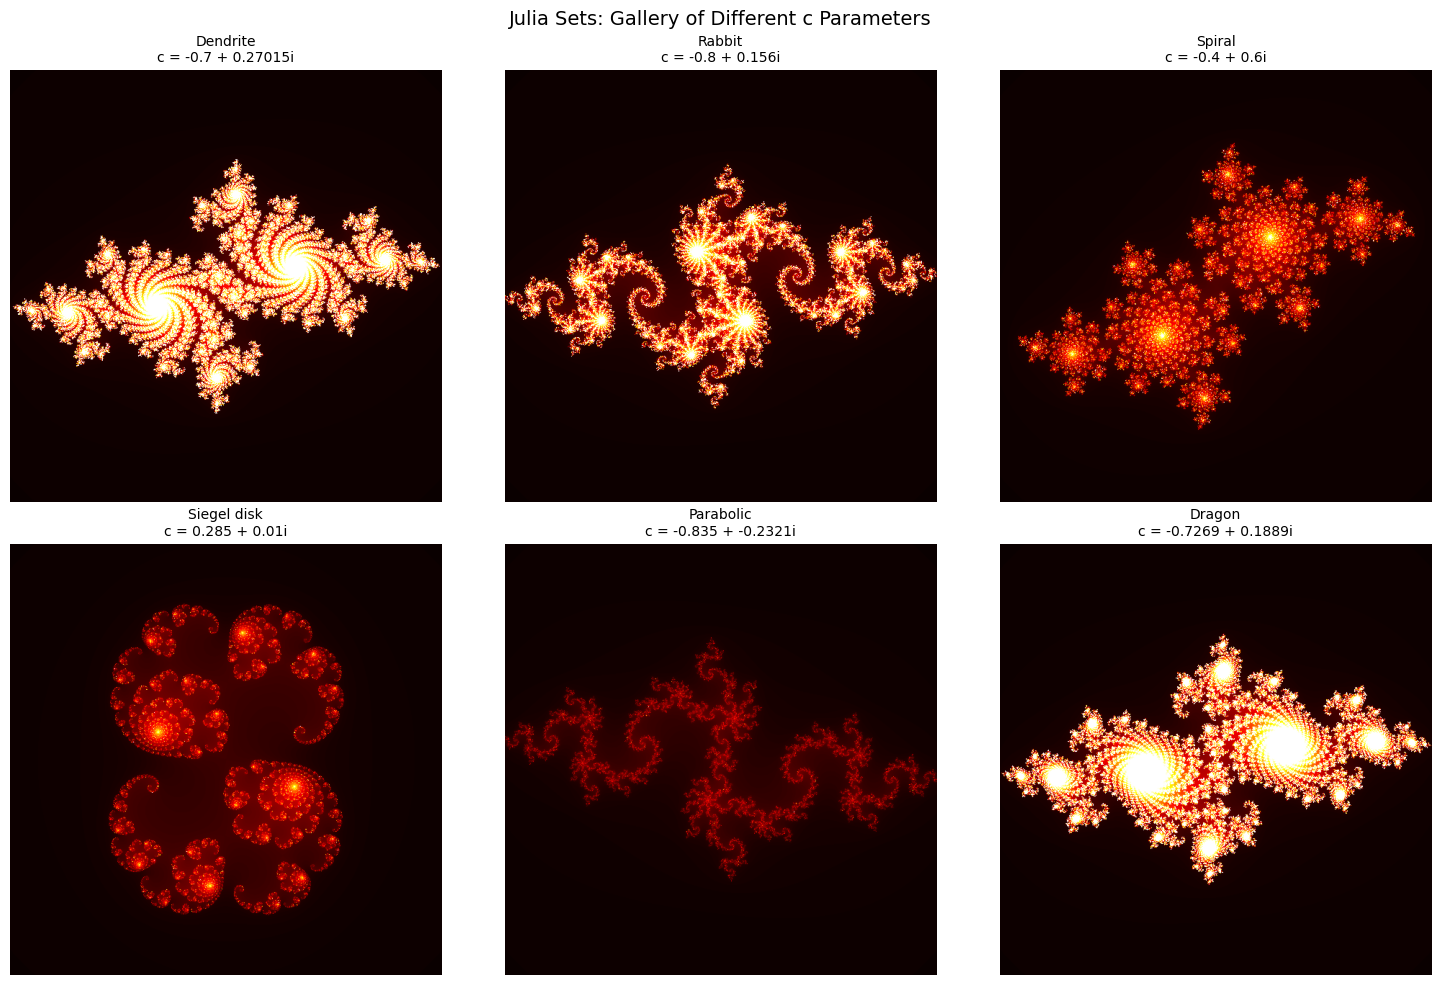

In [6]:
@jit(nopython=True, parallel=True)
def compute_julia(c_real, c_imag, x_min, x_max, y_min, y_max, width, height, max_iter):
    """Compute Julia set using escape-time algorithm."""
    result = np.zeros((height, width))
    
    for j in prange(height):
        for i in range(width):
            # Map pixel to complex plane
            x = x_min + (x_max - x_min) * i / width
            y = y_min + (y_max - y_min) * j / height
            
            # Iterate z -> z^2 + c
            zx, zy = x, y
            iteration = 0
            
            while zx*zx + zy*zy < 4 and iteration < max_iter:
                xtemp = zx*zx - zy*zy + c_real
                zy = 2*zx*zy + c_imag
                zx = xtemp
                iteration += 1
            
            result[j, i] = iteration
    
    return result

# Gallery of Julia sets with different c values
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Famous Julia set parameters
c_values = [
    (-0.7, 0.27015, "Dendrite"),
    (-0.8, 0.156, "Rabbit"),
    (-0.4, 0.6, "Spiral"),
    (0.285, 0.01, "Siegel disk"),
    (-0.835, -0.2321, "Parabolic"),
    (-0.7269, 0.1889, "Dragon")
]

for ax, (c_re, c_im, name) in zip(axes, c_values):
    julia = compute_julia(c_re, c_im, -1.5, 1.5, -1.5, 1.5, 600, 600, 256)
    ax.imshow(julia, cmap='hot', extent=[-1.5, 1.5, -1.5, 1.5])
    ax.set_title(f'{name}\nc = {c_re} + {c_im}i', fontsize=10)
    ax.axis('off')

fig.suptitle('Julia Sets: Gallery of Different c Parameters', fontsize=14)
plt.tight_layout()
plt.show()

## 1.6 Benoit Mandelbrot and the Mandelbrot Set (1975-1980)

Mandelbrot recognized that "pathological" constructions were not aberrations but the geometric language of natural complexity. He coined "fractal" in 1975.

The **Mandelbrot set** $\mathcal{M}$ consists of all parameters $c$ for which the orbit of $z = 0$ under $f_c(z) = z^2 + c$ remains bounded:

$$\mathcal{M} = \{c \in \mathbb{C} : |f_c^n(0)| \not\to \infty \}$$

**Properties:**
- The boundary has Hausdorff dimension 2
- Contains infinitely many scaled copies of itself
- Connected despite its intricate boundary

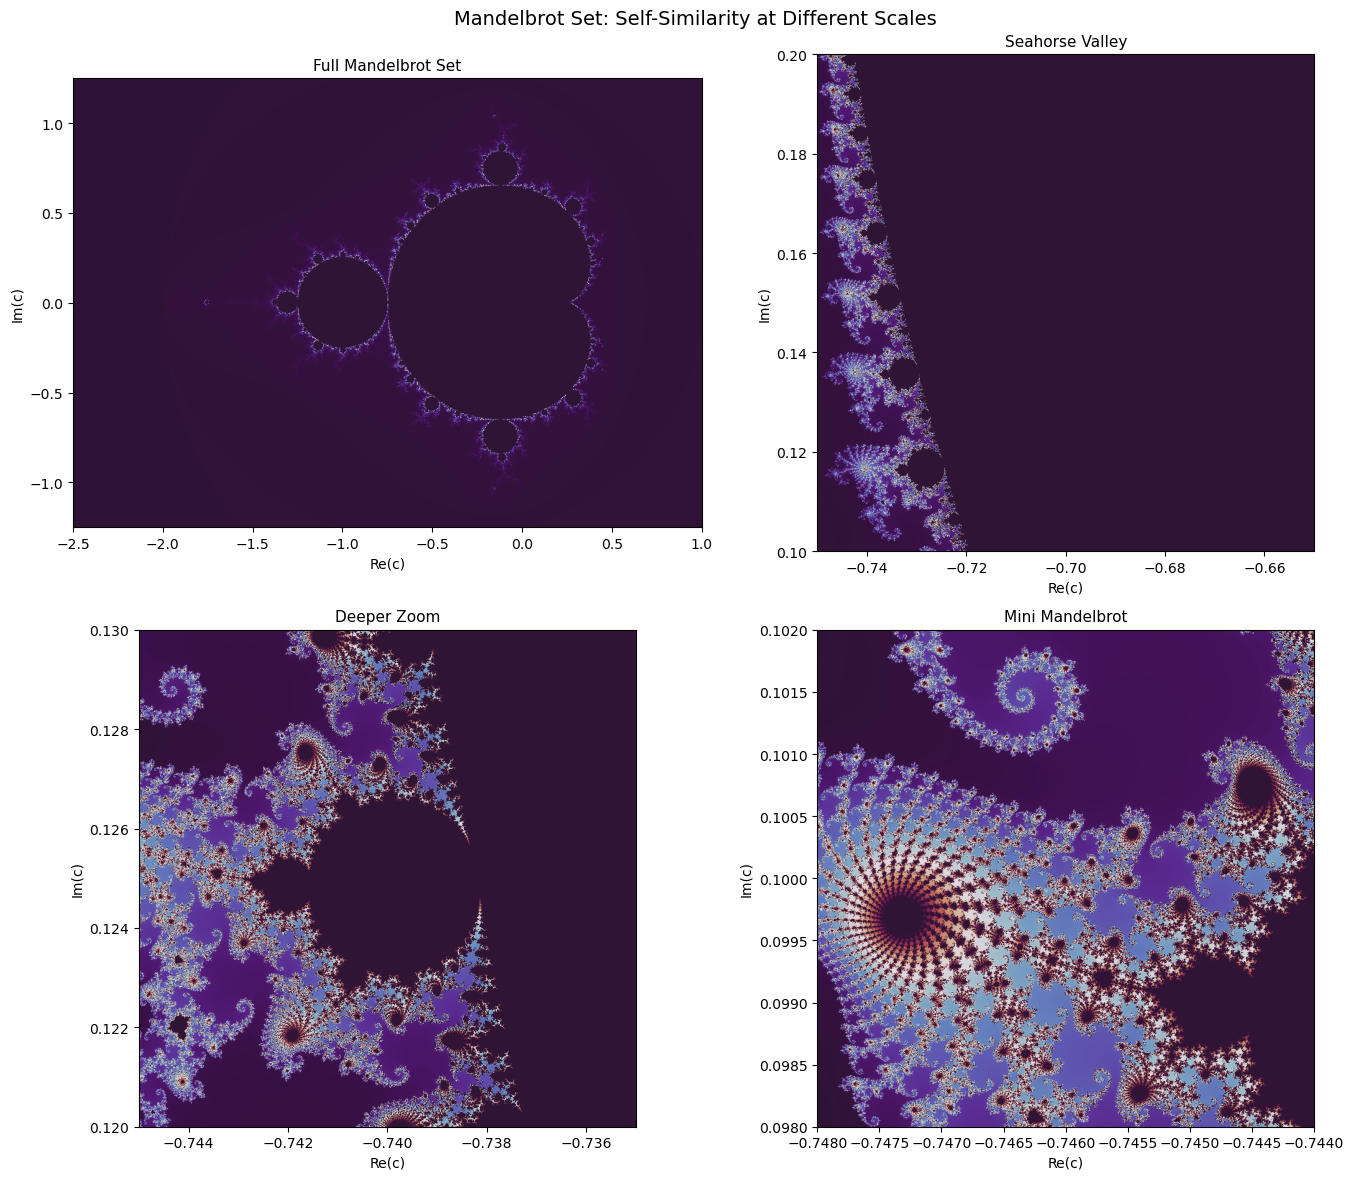

The Mandelbrot set boundary has Hausdorff dimension = 2
Small copies of the entire set appear at every scale.


In [7]:
@jit(nopython=True, parallel=True)
def compute_mandelbrot(x_min, x_max, y_min, y_max, width, height, max_iter):
    """Compute Mandelbrot set using escape-time algorithm."""
    result = np.zeros((height, width))
    
    for j in prange(height):
        for i in range(width):
            # Map pixel to complex plane (c value)
            c_real = x_min + (x_max - x_min) * i / width
            c_imag = y_min + (y_max - y_min) * j / height
            
            # Iterate z -> z^2 + c starting from z = 0
            zx, zy = 0.0, 0.0
            iteration = 0
            
            while zx*zx + zy*zy < 4 and iteration < max_iter:
                xtemp = zx*zx - zy*zy + c_real
                zy = 2*zx*zy + c_imag
                zx = xtemp
                iteration += 1
            
            result[j, i] = iteration
    
    return result

# Full Mandelbrot set
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Different zoom levels showing self-similarity
regions = [
    ((-2.5, 1.0, -1.25, 1.25), "Full Mandelbrot Set"),
    ((-0.75, -0.65, 0.1, 0.2), "Seahorse Valley"),
    ((-0.745, -0.735, 0.12, 0.13), "Deeper Zoom"),
    ((-0.748, -0.744, 0.098, 0.102), "Mini Mandelbrot")
]

for ax, ((x_min, x_max, y_min, y_max), title) in zip(axes.flatten(), regions):
    mandelbrot = compute_mandelbrot(x_min, x_max, y_min, y_max, 800, 800, 500)
    ax.imshow(mandelbrot, cmap='twilight_shifted', extent=[x_min, x_max, y_min, y_max])
    ax.set_title(title, fontsize=11)
    ax.set_xlabel('Re(c)')
    ax.set_ylabel('Im(c)')

fig.suptitle('Mandelbrot Set: Self-Similarity at Different Scales', fontsize=14)
plt.tight_layout()
plt.show()

print("The Mandelbrot set boundary has Hausdorff dimension = 2")
print("Small copies of the entire set appear at every scale.")

## Summary: Fractal Dimensions of Classical Examples

| Fractal | Year | $N$ copies | Scale $r$ | Dimension Formula | Value |
|---------|------|-----------|-----------|------------------|-------|
| Cantor Set | 1883 | 2 | 1/3 | $\log 2 / \log 3$ | 0.631 |
| Koch Curve | 1904 | 4 | 1/3 | $\log 4 / \log 3$ | 1.262 |
| Sierpinski Triangle | 1915 | 3 | 1/2 | $\log 3 / \log 2$ | 1.585 |
| Sierpinski Carpet | 1916 | 8 | 1/3 | $\log 8 / \log 3$ | 1.893 |
| Mandelbrot Boundary | 1980 | - | - | - | 2.000 |

In [8]:
# Calculate and display all dimensions
fractals = [
    ("Cantor Set", 2, 3, 1883),
    ("Koch Curve", 4, 3, 1904),
    ("Sierpinski Triangle", 3, 2, 1915),
    ("Sierpinski Carpet", 8, 3, 1916),
]

print("Self-Similar Fractal Dimensions: D = log(N) / log(1/r)")
print("=" * 60)
print(f"{'Fractal':<25} {'Year':>6} {'N':>4} {'1/r':>5} {'Dimension':>12}")
print("-" * 60)

for name, N, inv_r, year in fractals:
    D = np.log(N) / np.log(inv_r)
    print(f"{name:<25} {year:>6} {N:>4} {inv_r:>5} {D:>12.4f}")

print("=" * 60)

Self-Similar Fractal Dimensions: D = log(N) / log(1/r)
Fractal                     Year    N   1/r    Dimension
------------------------------------------------------------
Cantor Set                  1883    2     3       0.6309
Koch Curve                  1904    4     3       1.2619
Sierpinski Triangle         1915    3     2       1.5850
Sierpinski Carpet           1916    8     3       1.8928


## Further Reading

- Mandelbrot, B. B. *The Fractal Geometry of Nature*. W. H. Freeman, 1982.
- Falconer, Kenneth. *Fractal Geometry: Mathematical Foundations and Applications*. 3rd ed., Wiley, 2014.
- Peitgen, H.-O. and Richter, P. H. *The Beauty of Fractals*. Springer, 1986.

**Next:** See `2_mathematics.ipynb` for computational methods (box-counting, Hurst exponent, lacunarity).